<a href="https://colab.research.google.com/github/rponcemir/UScrimes-/blob/main/UScrimesESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTAR LIBRERIAS Y DATASET**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importar dataset

crime = pd.read_csv('/content/drive/MyDrive/US_Crime_DataSet.csv')


<ipython-input-3-605dbb10e0cc>:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('/content/drive/MyDrive/US_Crime_DataSet.csv')


In [ ]:
#Fuente del dataset:
'https://www.kaggle.com/datasets/mrayushagrawal/us-crime-dataset'



#**EDA**

In [ ]:
crime.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

- Ninguna variable tiene nulos.
- Perpetrator Age deberia ser de tipo int64, por lo que vamos a revisar si hay algun valor tipo string en la variable.

In [ ]:
crime['Perpetrator Age'].unique()

array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, '22', '52',
       '21', '0', '25', '61', '32', '28', '20', '38', '18', '17', '53',
       '30', '24', '84', '43', '16', '47', '54', '50', '42', '23', '36',
       '35', '60', '27', '19', '14', '57', '63', '81', '31', '58', '51',
       '15', '40', '33', '26', '41', '29', '34', '37', '69', '44', '48',
       '55', '49', '56', '39', '45', '65', '59', '70', '46', '11', '77',
       '67', '76', '85', '72', '13', '89', '74', '71', '64', '62', '3',
       '80', '73', '75', '83', '78', '68', '66', '86', '87', '95', '90',
       '6', '12', '99', '88', '9', '93', '10', 

Hay un valor tipo string que habrá que reemplazar.

In [ ]:
crime['Perpetrator Age'] = pd.to_numeric(crime['Perpetrator Age'], errors='coerce').astype('Int64')
crime['Perpetrator Age'].unique()

<IntegerArray>
[  15,   42,    0,   36,   27,   35,   40,   49,   39,   29,
 ...
   95,    4,   91,   92,   96,   94,    2,   98,   97, <NA>]
Length: 101, dtype: Int64

In [ ]:
crime.describe(include='all')

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
count,638454.00000,638454,638454,638454,638454,638454,638454.000000,638454,638454.000000,638454,...,638454,638454,638453.0,638454,638454,638454,638454,638454.000000,638454.000000,638454
unique,NaN,12003,9216,7,1782,51,NaN,12,NaN,2,...,3,3,<NA>,5,3,28,16,NaN,NaN,2
top,NaN,NY03030,New York,Municipal Police,Los Angeles,California,NaN,July,NaN,Murder or Manslaughter,...,Unknown,Male,<NA>,White,Unknown,Unknown,Handgun,NaN,NaN,FBI
freq,NaN,38416,38416,493026,44511,99783,NaN,58696,NaN,629338,...,368303,399541,<NA>,218243,446410,273013,317484,NaN,NaN,616647
mean,319227.50000,NaN,NaN,NaN,NaN,NaN,1995.801102,NaN,22.967924,NaN,...,NaN,NaN,20.322697,NaN,NaN,NaN,NaN,0.123334,0.185224,NaN
std,184305.93872,NaN,NaN,NaN,NaN,NaN,9.927693,NaN,92.149821,NaN,...,NaN,NaN,17.886842,NaN,NaN,NaN,NaN,0.537733,0.585496,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,0.000000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,159614.25000,NaN,NaN,NaN,NaN,NaN,1987.000000,NaN,1.000000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,319227.50000,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,2.000000,NaN,...,NaN,NaN,21.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,478840.75000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,10.000000,NaN,...,NaN,NaN,31.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


- No hay nulos en Victim Ethnicity, Perpetrator Ethnicity y Relationship, pero el valor mas frecuente es en los tres casos es 'Unknown', por lo que tendremos que imputar o dropear la columna.

- El valor mas frecuente de Perpetrator Age es 0.0, lo cual no parece muy real.

In [ ]:
crime.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638453.0,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,20.322697,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,17.886842,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.0,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,21.0,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,31.0,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,99.0,10.000000,10.000000


- Tenemos outliers/errores en Victim Age ya que la edad maxima es 998.


Columnas a Dropear:
- Record ID (no nos sirve).
- Agency Code (no es importante: el nombre y el tipo sí pueden ser relevantes).
- Record Source.
- Incident.


In [ ]:
crime = crime.drop(columns=['Record ID', 'Agency Code', 'Record Source', 'Incident'])
crime

,Agency Name,Agency Type,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Park County,Sheriff,Park,Wyoming,2014,January,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
638450,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0
638451,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0
638452,Sublette County,Sheriff,Sublette,Wyoming,2014,December,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1


###SEPARAR CATEGORICAS/NUMERICAS

In [ ]:
numerical = crime.select_dtypes(exclude=object).columns
numerical

Index(['Year', 'Victim Age', 'Perpetrator Age', 'Victim Count',
       'Perpetrator Count'],
      dtype='object')

In [ ]:
categorical = crime.select_dtypes(include=object).columns
categorical

Index(['Agency Name', 'Agency Type', 'City', 'State', 'Month', 'Crime Type',
       'Crime Solved', 'Victim Sex', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Ethnicity',
       'Relationship', 'Weapon'],
      dtype='object')

####Exploración de variables categoricas

In [ ]:
#Valores nulos en categorical variables

crime[categorical].isnull().sum()

Agency Name              0
Agency Type              0
City                     0
State                    0
Month                    0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
dtype: int64

In [ ]:
# Frecuencia de los valores de las variables categoricas

for var in categorical:

    print(crime[var].value_counts())

New York                      38416
Los Angeles                   29007
Chicago                       21331
Detroit                       17206
Houston                       13046
                              ...  
Benedict College                  1
Riverside Township                1
White Haven Borough               1
South Londonderry Township        1
Sublette County                   1
Name: Agency Name, Length: 9216, dtype: int64
Municipal Police    493026
Sheriff             105322
County Police        22693
State Police         14235
Special Police        2889
Regional Police        235
Tribal Police           54
Name: Agency Type, dtype: int64
Los Angeles    44511
New York       38431
Cook           22383
Wayne          19904
Harris         16331
               ...  
Gentry             1
Wheatland          1
Loup               1
Haines             1
Treasure           1
Name: City, Length: 1782, dtype: int64
California              99783
Texas                   62095
New Yor

VALORES UNKNOWN
- Como ya habíamos observado antes, Victim Ethnicity, Perpetrator Ethnicity y Relationship tienen un número de valores Unknown muy alto. 368.303 (la mitad), 446.410 (más de la mitad) y 273.013 respectivamente.
- Victim Sex = 984 valores Unknown
- Victim Race = 6.676 valores Unknown
- Perpetrator Sex =  190.365 valores Unknown
- Perp. Race = 196.047 valores Unknown
- Weapon = 33.192 valores Unknown



DROPEAR
- Victim Ethnicity y Perpetrator Ethnicity pueden dropearse ya que la cantidad de valores desconocidos sobrepasa el 50% y ya contamos con variables Victim Race y Perpetrator Race.


In [ ]:
crime = crime.drop(columns=['Victim Ethnicity', 'Perpetrator Ethnicity'])
crime

,Agency Name,Agency Type,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
2,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
4,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Park County,Sheriff,Park,Wyoming,2014,January,Murder or Manslaughter,No,Male,30,White,Unknown,0,Unknown,Unknown,Handgun,0,0
638450,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,Murder or Manslaughter,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun,0,0
638451,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0,0
638452,Sublette County,Sheriff,Sublette,Wyoming,2014,December,Murder or Manslaughter,Yes,Male,55,White,Male,31,White,Stranger,Knife,0,1


In [ ]:
categorical = categorical.drop(labels=['Victim Ethnicity', 'Perpetrator Ethnicity'])
categorical

Index(['Agency Name', 'Agency Type', 'City', 'State', 'Month', 'Crime Type',
       'Crime Solved', 'Victim Sex', 'Victim Race', 'Perpetrator Sex',
       'Perpetrator Race', 'Relationship', 'Weapon'],
      dtype='object')

In [ ]:
# comprobar cardinalida en variables categoricas

for var in categorical:

    print(var, ' contains ', len(crime[var].unique()), ' labels')

Agency Name  contains  9216  labels
Agency Type  contains  7  labels
City  contains  1782  labels
State  contains  51  labels
Month  contains  12  labels
Crime Type  contains  2  labels
Crime Solved  contains  2  labels
Victim Sex  contains  3  labels
Victim Race  contains  5  labels
Perpetrator Sex  contains  3  labels
Perpetrator Race  contains  5  labels
Relationship  contains  28  labels
Weapon  contains  16  labels


Agency Name y City contienen demasiados labels.

In [ ]:
#dropear Agency Name y City
crime = crime.drop(columns=['Agency Name', 'City'])
crime

,Agency Type,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,Municipal Police,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
1,Municipal Police,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
2,Municipal Police,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0
3,Municipal Police,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
4,Municipal Police,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Sheriff,Wyoming,2014,January,Murder or Manslaughter,No,Male,30,White,Unknown,0,Unknown,Unknown,Handgun,0,0
638450,Sheriff,Wyoming,2014,June,Murder or Manslaughter,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun,0,0
638451,Municipal Police,Wyoming,2014,September,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0,0
638452,Sheriff,Wyoming,2014,December,Murder or Manslaughter,Yes,Male,55,White,Male,31,White,Stranger,Knife,0,1


In [ ]:
categorical = categorical.drop(labels=['Agency Name', 'City'])
categorical

Index(['Agency Type', 'State', 'Month', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Race', 'Perpetrator Sex', 'Perpetrator Race',
       'Relationship', 'Weapon'],
      dtype='object')

In [ ]:
#Finalmente, vamos a reemplazar todos los Unknown por nulos

crime.replace('Unknown', np.nan, inplace=True)

####Exploracion de varibles numericas.

In [ ]:
crime[numerical].isnull().sum()

Year                 0
Victim Age           0
Perpetrator Age      1
Victim Count         0
Perpetrator Count    0
dtype: int64

In [ ]:
crime['Perpetrator Age'].dtypes

Int64Dtype()

In [ ]:
for var in numerical:

    print(crime[var].value_counts())

1993    24335
1992    23793
1994    23246
1980    23092
1991    22657
1990    21246
1981    21208
1995    21179
1982    20544
1986    20125
1989    19868
1983    19653
1996    18969
1987    18783
1988    18779
1985    18386
1984    18093
1997    17794
2007    17303
2006    17275
2005    16836
2003    16512
2002    16268
2004    16233
1998    16061
2009    15840
2001    15803
2008    15595
2010    15121
2012    15033
2011    14756
2000    14671
1999    14621
2013    14445
2014    14331
Name: Year, dtype: int64
22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 101, dtype: int64
0     216327
20     21625
19     20250
21     18983
18     18834
       ...  
95         9
96         7
98         7
2          6
97         3
Name: Perpetrator Age, Length: 100, dtype: Int64
0     586059
1      38750
2       8156
3       2847
4       1084
5        510
9        290
6        286
7        168


- Ya sabemos que el valor nulo de Perpetrator Age es el que se ha creado antes. Se va a imputar.
- Otra observación es que Perp. Age tiene 216.327 valores de 0 años, lo cual es poco probable. También hay un valor de 1 año. 97 y 98 años es sospechoso
- Victim Count y Perpetrator Count tampoco deberían tener valores = 0
- Dado que Perpetrator Count no es muy clara y una gran mayoría de valores son=0, vamos a dropearla. También podriamos hacer lo mismo con Victim Count.

In [ ]:
crime = crime.drop(columns=['Perpetrator Count'])


In [ ]:
numerical = numerical.drop(labels=['Perpetrator Count'])

Antes de buscar outliers, voy a convertir los 0 en nulos.

In [ ]:
crime['Victim Count'].replace(0, np.nan, inplace=True)


In [ ]:
print(crime['Victim Count'].unique())

[nan  2.  1.  3.  6.  4.  5.  9.  7.  8. 10.]


In [ ]:
crime['Victim Count'].dtypes

dtype('float64')

In [ ]:
crime['Victim Count'] = pd.to_numeric(crime['Victim Count'], errors='coerce').astype('Int64')

In [ ]:
print(crime['Victim Count'].unique())

<IntegerArray>
[<NA>, 2, 1, 3, 6, 4, 5, 9, 7, 8, 10]
Length: 11, dtype: Int64


####Errores

- Hemos visto que hay valores dudosos en Perpetrator Age (edad 0, 1). Teniendo en cuenta que son casos de asesinato, es un poco raro que la edad del perpetrador sea tan baja.
- Tambien en Victim Age (edad 998).

#####Victim Age

In [ ]:
crime['Victim Age'].value_counts()[998]

974

In [ ]:
media_columna = crime['Victim Age'].mean()
age_mean = int(media_columna)
age_mean

35

In [ ]:
# Reemplaza el valor específico por la media calculada
valor_especifico = 998
crime['Victim Age'] = crime['Victim Age'].replace(valor_especifico, age_mean)
crime['Victim Age'].unique()

array([14, 43, 30, 42, 99, 32, 38, 36, 20, 48, 31, 16, 33, 27, 21, 60, 40,
       18,  8, 25, 24, 46, 23, 22, 45, 26, 58, 17, 29, 41, 68, 13, 35, 44,
       54, 37, 51, 90, 50, 52, 61, 63, 19, 28, 70, 72, 74, 53, 57, 76, 79,
       69, 34, 66, 55, 67, 65, 47,  1, 49, 62, 75, 56, 59, 78, 39, 15,  0,
       71, 77,  2,  4, 64, 82, 85,  6,  5,  7,  9, 84, 10, 86, 11, 73, 83,
       81, 87, 80,  3, 12, 94, 93, 92, 89, 97, 88, 91, 95, 98, 96])

#####Perpetrator Age

In [ ]:
crime['Perpetrator Age'].unique()

<IntegerArray>
[  15,   42,    0,   36,   27,   35,   40,   49,   39,   29,
 ...
   95,    4,   91,   92,   96,   94,    2,   98,   97, <NA>]
Length: 101, dtype: Int64

In [ ]:
print(crime['Perpetrator Age'].unique().tolist())

[15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61, 25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45, 64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55, 50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59, 10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84, 85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, <NA>]


In [ ]:
media_columna = crime['Perpetrator Age'].mean()
age_mean = int(media_columna)
age_mean

20

Antes de sustituirlo, voy a analizar un poco más la variable.

In [ ]:
perpetrators = crime.loc[:,['Crime Type', 'Weapon', 'Perpetrator Age', 'Victim Count']].loc[crime['Perpetrator Age']<=3].groupby(by=['Crime Type', 'Weapon', 'Perpetrator Age']).count()
perpetrators

Victim Count
Crime Type                 Weapon        Perpetrator Age              
Manslaughter by Negligence Blunt Object  0                           0
                                         1                           0
                           Drowning      0                           0
                                         3                           0
                           Drugs         0                           0
                                         1                           0
                           Explosives    0                           0
                           Fall          0                           0
                           Fire          0                           3
                                         3                           0
                           Firearm       0                           0
                           Gun           0                           0
                           Handgun       0                           1
                                         2                           0
                                         3                           0
                           Knife         0                           0
                           Poison        0                           2
                           Rifle         0                           0
                                         3                           0
                           Shotgun       0                           0
                                         3                           0
                           Suffocation   0                           0
Murder or Manslaughter     Blunt Object  0                         570
                                         1                           0
                                         3                           0
                           Drowning      0                          18
                           Drugs         0                           7
                           Explosives    0                          36
                           Fall          0                           2
                           Fire          0                         873
                           Firearm       0                        2195
                                         1                           2
                                         2                           0
                                         3                           0
                           Gun           0                         124
                                         1                           0
                           Handgun       0                        9297
                                         1                           3
                                         3                           0
                           Knife         0                        1193
                                         1                           0
                                         3                           0
                           Poison        0                           5
                           Rifle         0                         699
                                         1                           0
                                         3                           0
                           Shotgun       0                         505
                                         1                           0
                                         2                           0
                           Strangulation 0                         141
                           Suffocation   0                         137

In [ ]:
perpetrators2 = crime.loc[:,['Crime Solved', 'Crime Type', 'Perpetrator Age', 'Victim Count']].loc[crime['Perpetrator Age']<=3].groupby(by=['Crime Type', 'Crime Solved', 'Perpetrator Age']).count()
perpetrators2

Victim Count
Crime Type                 Crime Solved Perpetrator Age              
Manslaughter by Negligence No           0                          12
                           Yes          0                           6
                                        1                           0
                                        2                           0
                                        3                           0
Murder or Manslaughter     No           0                       14374
                                        1                           1
                           Yes          0                        2295
                                        1                           4
                                        2                           0
                                        3                           0

- **Vemos que la mayoria de los crímenes cometidos por menores de 3 anos son Murder or Manslaughter, es decir con intención. Además, muchas de las armas suspuestamente usadas, como Explosivos, no pueden físicamente ser usadas intencionadamente por un bebé.**

- **En la segunda tabla, vemos que el valor 0 no está necesariamente relacionado con desconocer al perpetrador del crimen, porque muchos de los crimenes con ese valor están resueltos.**

**Por eso, por ahora voy a sustituir los 0 por nulos, aunque es posible que dropee la variable**.

In [ ]:
crime['Perpetrator Age'] = crime['Perpetrator Age'].replace(0, np.nan)

In [ ]:
crime['Perpetrator Age'] = pd.to_numeric(crime['Perpetrator Age'], errors='coerce').astype('Int64')

In [ ]:
crime[numerical].isnull().sum()

Year                    0
Victim Age              0
Perpetrator Age    216328
Victim Count       586059
dtype: int64

A lo mejor hay que dropear Victim Count

#####Outliers en numericas

In [ ]:
#buscar outliers
def calculate_outliers_iqr(df:pd.DataFrame, col_name:str)->int:
  q1,q3 = df[col_name].quantile([0.25,0.75])
  iqr = q3-q1

  outliers = ((df[col_name] < q1 - 1.5 * iqr) | (df[col_name] > q3 + 1.5 * iqr))
  return len(df[outliers])

for col in numerical:
  print(f"{col} has {calculate_outliers_iqr(crime, col)} outliers")

Year has 0 outliers
Victim Age has 30700 outliers
Perpetrator Age has 12887 outliers
Victim Count has 2642 outliers


Text(0, 0.5, 'Victim Count')

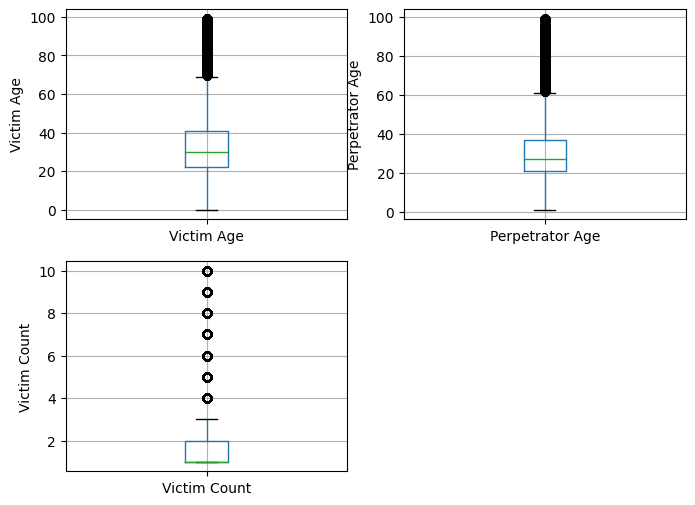

In [ ]:
plt.figure(figsize=(8,6))


plt.subplot(2, 2, 1)
fig = crime.boxplot(column='Victim Age')
fig.set_title('')
fig.set_ylabel('Victim Age')


plt.subplot(2, 2, 2)
fig = crime.boxplot(column='Perpetrator Age')
fig.set_title('')
fig.set_ylabel('Perpetrator Age')


plt.subplot(2, 2, 3)
fig = crime.boxplot(column='Victim Count')
fig.set_title('')
fig.set_ylabel('Victim Count')




In [ ]:
IQR = crime['Victim Age'].quantile(0.75) - crime['Victim Age'].quantile(0.25)
Lower_fence = crime['Victim Age'].quantile(0.25) - (IQR * 1.5)
Upper_fence = crime['Victim Age'].quantile(0.75) + (IQR * 1.5)
print('Los outliers de Victim Age son valores < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Los outliers de Victim Age son valores < -6.5 or > 69.5


In [ ]:
IQR = crime['Victim Count'].quantile(0.75) - crime['Victim Count'].quantile(0.25)
Lower_fence = crime['Victim Count'].quantile(0.25) - (IQR * 1.5)
Upper_fence = crime['Victim Count'].quantile(0.75) + (IQR * 1.5)
print('Los outliers de Victim Count son valores < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers de Victim Count son valores < -0.5 or > 3.5


In [ ]:
IQR = crime['Perpetrator Age'].quantile(0.75) - crime['Perpetrator Age'].quantile(0.25)
Lower_fence = crime['Perpetrator Age'].quantile(0.25) - (IQR * 1.5)
Upper_fence = crime['Perpetrator Age'].quantile(0.75) + (IQR * 1.5)
print('Los outliers de Perpetrator Age son valores < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers de Perpetrator Age son valores < -3.0 or > 61.0


#**IMPUTE**

In [ ]:
#Separar en X, y
X = crime.drop(columns=['Crime Solved'])
y = crime['Crime Solved'] #target variable


In [ ]:
##Imputar y OneHotEncoder
numerical_col = ['Year', 'Victim Age', 'Perpetrator Age', 'Victim Count']
categorical_col = ['Agency Type',
 'State',
 'Month',
 'Crime Type',
 'Victim Sex',
 'Victim Race',
 'Perpetrator Sex',
 'Perpetrator Race',
 'Relationship',
 'Weapon']
# imputer for numeric_cols. Imputar los nulos por la mediana
num_imputer = SimpleImputer(strategy='median')
# imputer for categorical cols. Imputar los nulos por la moda
cat_imputer = SimpleImputer(strategy='most_frequent')

preprocessor_imputer = ColumnTransformer(
    transformers=[
        ('numeric_imputer', num_imputer, numerical_col)
        ,('categorical_imputer', cat_imputer, categorical_col)
    ]
    ,remainder='passthrough'
)

#aplicar la imputacion al DF y llamarlo de otra manera.
crime_imputed = pd.DataFrame(data=preprocessor_imputer.fit_transform(X), columns=numerical_col+categorical_col)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    crime_imputed,
    y,
    test_size=0.2
)


In [ ]:
X_train.shape, X_test.shape

((510763, 14), (127691, 14))

In [ ]:
X_train.head()

,Year,Victim Age,Perpetrator Age,Victim Count,Agency Type,State,Month,Crime Type,Victim Sex,Victim Race,Perpetrator Sex,Perpetrator Race,Relationship,Weapon
31317,1981.0,49.0,30.0,1.0,State Police,Indiana,January,Murder or Manslaughter,Male,White,Female,White,Husband,Handgun
69298,1983.0,26.0,20.0,1.0,Sheriff,Florida,March,Murder or Manslaughter,Male,Black,Female,Black,Boyfriend,Knife
298506,1994.0,21.0,18.0,1.0,Municipal Police,Georgia,June,Murder or Manslaughter,Male,Black,Male,Black,Friend,Handgun
520505,2007.0,19.0,38.0,1.0,Municipal Police,Florida,December,Murder or Manslaughter,Male,Black,Male,Black,Acquaintance,Knife
53063,1982.0,21.0,21.0,1.0,Sheriff,Louisiana,January,Murder or Manslaughter,Male,Black,Male,Black,Stranger,Handgun


In [ ]:
y_train.isnull().sum()

0

In [ ]:
y_train.value_counts()

Yes    358575
No     152188
Name: Crime Solved, dtype: int64

#**PREPROCESSING**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder', OneHotEncoder(), categorical_col),
        ('drop_categorical', 'drop', categorical_col),
        ('scaler', StandardScaler(), numerical_col)
    ]
    ,remainder='passthrough'
)

crime_preprocessed = preprocessor.fit_transform(crime_imputed)

#**TRAIN MODELS**

##REGRESION LOGISTICA

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', LogisticRegression(penalty=None, solver='lbfgs', random_state=0))
])
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m', LogisticRegression(penalty=None, random_state=0))])

In [ ]:
y_pred = pipeline.predict(X_test)
print("Real: ", y_test)
print("Prediccion: ", y_pred)

Real:  601279    Yes
268451    Yes
320576    Yes
153320    Yes
218389     No
         ... 
464823    Yes
586553     No
145432    Yes
544856     No
424246     No
Name: Crime Solved, Length: 127691, dtype: object
Prediccion:  ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)



Accuracy:  0.885081955658582


In [ ]:
out = classification_report(y_test, y_pred, output_dict=True)
out

{'No': {'precision': 0.7892500741033495,
  'recall': 0.8387672599359479,
  'f1-score': 0.813255618620988,
  'support': 38094},
 'Yes': {'precision': 0.9295698739780064,
  'recall': 0.9047735973302677,
  'f1-score': 0.917004140177824,
  'support': 89597},
 'accuracy': 0.885081955658582,
 'macro avg': {'precision': 0.859409974040678,
  'recall': 0.8717704286331078,
  'f1-score': 0.865129879399406,
  'support': 127691},
 'weighted avg': {'precision': 0.8877083296528372,
  'recall': 0.885081955658582,
  'f1-score': 0.8860528892659656,
  'support': 127691}}

###otros parametros

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', LogisticRegression(penalty='l1', solver='liblinear', random_state=0))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m',
                 LogisticRegression(penalty='l1', random_state=0,
                                    solver='liblinear'))])

In [ ]:
y_pred2 = pipeline.predict(X_test)
print("Real: ", y_test)
print("Prediccion: ", y_pred2)

Real:  601279    Yes
268451    Yes
320576    Yes
153320    Yes
218389     No
         ... 
464823    Yes
586553     No
145432    Yes
544856     No
424246     No
Name: Crime Solved, Length: 127691, dtype: object
Prediccion:  ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']


In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy: ", accuracy2)


Accuracy:  0.8850976184695868


In [ ]:
out2 = classification_report(y_test, y_pred2, output_dict=True)
out2

{'No': {'precision': 0.7893176540342902,
  'recall': 0.8387147582296425,
  'f1-score': 0.8132668126049992,
  'support': 38094},
 'Yes': {'precision': 0.929551787004231,
  'recall': 0.9048182416821992,
  'f1-score': 0.9170182681975001,
  'support': 89597},
 'accuracy': 0.8850976184695868,
 'macro avg': {'precision': 0.8594347205192606,
  'recall': 0.8717664999559208,
  'f1-score': 0.8651425404012496,
  'support': 127691},
 'weighted avg': {'precision': 0.8877157996491557,
  'recall': 0.8850976184695868,
  'f1-score': 0.8860661419760691,
  'support': 127691}}

**El resultado no cambia mucho del anterior.**

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', LogisticRegression(penalty='l2', solver='lbfgs', random_state=42))
])
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m', LogisticRegression(random_state=42))])

In [ ]:
y_pred3 = pipeline.predict(X_test)
print("Real: ", y_test)
print("Prediccion: ", y_pred2)

Real:  601279    Yes
268451    Yes
320576    Yes
153320    Yes
218389     No
         ... 
464823    Yes
586553     No
145432    Yes
544856     No
424246     No
Name: Crime Solved, Length: 127691, dtype: object
Prediccion:  ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']


In [ ]:
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy: ", accuracy3)


Accuracy:  0.8851446069026008


In [ ]:
out3 = classification_report(y_test, y_pred3, output_dict=True)
out3

{'No': {'precision': 0.7896780256194669,
  'recall': 0.8382684937260461,
  'f1-score': 0.8132481026842561,
  'support': 38094},
 'Yes': {'precision': 0.9293892473611223,
  'recall': 0.9050749467058049,
  'f1-score': 0.9170709640938649,
  'support': 89597},
 'accuracy': 0.8851446069026008,
 'macro avg': {'precision': 0.8595336364902946,
  'recall': 0.8716717202159254,
  'f1-score': 0.8651595333890605,
  'support': 127691},
 'weighted avg': {'precision': 0.8877092598833313,
  'recall': 0.8851446069026008,
  'f1-score': 0.8860975354063486,
  'support': 127691}}

**Tampoco cambia mucho**

In [ ]:
data = {
    'model': ['modelo 1', 'modelo 2', 'modelo 3'],
    'score': [accuracy, accuracy2, accuracy3]
}

regresion = pd.DataFrame(data)
regresion

,model,score
0,modelo 1,0.885082
1,modelo 2,0.885098
2,modelo 3,0.885145


##ARBOL DE DECISION

In [ ]:
pipeline2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0))
])

In [ ]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m', DecisionTreeClassifier(max_depth=3, random_state=0))])

In [ ]:
y_pred_a = pipeline2.predict(X_test)

In [ ]:
print("Real: ", y_test)
print("Prediccion: ", y_pred_a)

Real:  601279    Yes
268451    Yes
320576    Yes
153320    Yes
218389     No
         ... 
464823    Yes
586553     No
145432    Yes
544856     No
424246     No
Name: Crime Solved, Length: 127691, dtype: object
Prediccion:  ['Yes' 'Yes' 'No' ... 'Yes' 'Yes' 'No']


In [ ]:
accuracy_a = accuracy_score(y_test, y_pred_a)
print("Accuracy: ", accuracy_a)

Accuracy:  0.9721358592226547


In [ ]:
out_a = classification_report(y_test, y_pred_a, output_dict=True)
out_a

{'No': {'precision': 0.917828106852497,
  'recall': 0.9957473617892582,
  'f1-score': 0.9552013296064062,
  'support': 38094},
 'Yes': {'precision': 0.9981241967046073,
  'recall': 0.962096945210219,
  'f1-score': 0.97977949533985,
  'support': 89597},
 'accuracy': 0.9721358592226547,
 'macro avg': {'precision': 0.9579761517785521,
  'recall': 0.9789221534997385,
  'f1-score': 0.9674904124731281,
  'support': 127691},
 'weighted avg': {'precision': 0.9741694994524416,
  'recall': 0.9721358592226547,
  'f1-score': 0.9724471019413348,
  'support': 127691}}

Mucha mejor precision

###Otros parametros

In [ ]:
pipeline2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42))
])
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=42))])

In [ ]:
y_pred_a2 = pipeline2.predict(X_test)
print("Real: ", y_test)
print("Prediccion: ", y_pred_a2)

Real:  601279    Yes
268451    Yes
320576    Yes
153320    Yes
218389     No
         ... 
464823    Yes
586553     No
145432    Yes
544856     No
424246     No
Name: Crime Solved, Length: 127691, dtype: object
Prediccion:  ['Yes' 'Yes' 'No' ... 'Yes' 'Yes' 'No']


In [ ]:
accuracy_a2 = accuracy_score(y_test, y_pred_a2)
print("Accuracy: ", accuracy_a2)

Accuracy:  0.97642746943794


In [ ]:
out_a2 = classification_report(y_test, y_pred_a2, output_dict=True)
out_a2

{'No': {'precision': 0.9329220138203357,
  'recall': 0.9923347508794036,
  'f1-score': 0.9617116544127001,
  'support': 38094},
 'Yes': {'precision': 0.9966502621284602,
  'recall': 0.9696641628625958,
  'f1-score': 0.9829720311368573,
  'support': 89597},
 'accuracy': 0.97642746943794,
 'macro avg': {'precision': 0.9647861379743979,
  'recall': 0.9809994568709997,
  'f1-score': 0.9723418427747788,
  'support': 127691},
 'weighted avg': {'precision': 0.9776382417742481,
  'recall': 0.97642746943794,
  'f1-score': 0.9766294322776577,
  'support': 127691}}

**La puntuacion mejora un poco con estos parametros.**

In [ ]:
pipeline2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=123))
])
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m', DecisionTreeClassifier(random_state=123))])

In [ ]:
y_pred_a3 = pipeline2.predict(X_test)
print("Real: ", y_test)
print("Prediccion: ", y_pred_a3)

Real:  601279    Yes
268451    Yes
320576    Yes
153320    Yes
218389     No
         ... 
464823    Yes
586553     No
145432    Yes
544856     No
424246     No
Name: Crime Solved, Length: 127691, dtype: object
Prediccion:  ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [ ]:
accuracy_a3 = accuracy_score(y_test, y_pred_a3)
print("Accuracy: ", accuracy_a3)

Accuracy:  0.9699352342764956


In [ ]:
out_a3 = classification_report(y_test, y_pred_a3, output_dict=True)
out_a3

{'No': {'precision': 0.9497413544101042,
  'recall': 0.9494671076809996,
  'f1-score': 0.9496042112448639,
  'support': 38094},
 'Yes': {'precision': 0.9785175430765111,
  'recall': 0.9786376776008125,
  'f1-score': 0.9785776066516001,
  'support': 89597},
 'accuracy': 0.9699352342764956,
 'macro avg': {'precision': 0.9641294487433076,
  'recall': 0.9640523926409061,
  'f1-score': 0.964090908948232,
  'support': 127691},
 'weighted avg': {'precision': 0.9699327553384707,
  'recall': 0.9699352342764956,
  'f1-score': 0.9699339863132505,
  'support': 127691}}

In [ ]:
data = {
    'model': ['modelo 1', 'modelo 2', 'modelo 3'],
    'score': [accuracy_a, accuracy_a2, accuracy_a3]
}

decisiontree = pd.DataFrame(data)
decisiontree

,model,score
0,modelo 1,0.972136
1,modelo 2,0.976427
2,modelo 3,0.969935


##ADABOOST CLASSIFIER

In [ ]:
pipeline3 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0))
])

pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m', AdaBoostClassifier(learning_rate=1, random_state=0))])

In [ ]:
y_pred_ada = pipeline3.predict(X_test)

In [ ]:
print("Real: ", y_test)
print("Prediccion: ", y_pred_ada)

Real:  601279    Yes
268451    Yes
320576    Yes
153320    Yes
218389     No
         ... 
464823    Yes
586553     No
145432    Yes
544856     No
424246     No
Name: Crime Solved, Length: 127691, dtype: object
Prediccion:  ['Yes' 'Yes' 'No' ... 'Yes' 'Yes' 'No']


In [ ]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy: ", accuracy_ada)

Accuracy:  0.9788160481161554


In [ ]:
out_ada = classification_report(y_test, y_pred_ada, output_dict=True)
out_ada

{'No': {'precision': 0.9423514412139696,
  'recall': 0.9895259095920618,
  'f1-score': 0.9653626992765222,
  'support': 38094},
 'Yes': {'precision': 0.9954498802600068,
  'recall': 0.9742625311115327,
  'f1-score': 0.9847422540851839,
  'support': 89597},
 'accuracy': 0.9788160481161554,
 'macro avg': {'precision': 0.9689006607369882,
  'recall': 0.9818942203517973,
  'f1-score': 0.975052476680853,
  'support': 127691},
 'weighted avg': {'precision': 0.9796090462386603,
  'recall': 0.9788160481161554,
  'f1-score': 0.9789607600027415,
  'support': 127691}}

###Otros parametros

In [ ]:
pipeline3 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                    random_state=42))])

In [ ]:
y_pred_ada2 = pipeline3.predict(X_test)

In [ ]:
accuracy_ada2 = accuracy_score(y_test, y_pred_ada2)
print("Accuracy: ", accuracy_ada2)

Accuracy:  0.973208761776476


In [ ]:
out_ada2 = classification_report(y_test, y_pred_ada, output_dict=True)
out_ada2

{'No': {'precision': 0.9423514412139696,
  'recall': 0.9895259095920618,
  'f1-score': 0.9653626992765222,
  'support': 38094},
 'Yes': {'precision': 0.9954498802600068,
  'recall': 0.9742625311115327,
  'f1-score': 0.9847422540851839,
  'support': 89597},
 'accuracy': 0.9788160481161554,
 'macro avg': {'precision': 0.9689006607369882,
  'recall': 0.9818942203517973,
  'f1-score': 0.975052476680853,
  'support': 127691},
 'weighted avg': {'precision': 0.9796090462386603,
  'recall': 0.9788160481161554,
  'f1-score': 0.9789607600027415,
  'support': 127691}}

In [ ]:
pipeline3 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('m', AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=100))
])

pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('drop_categorical', 'drop',
                                                  ['Agency Type', 'State',
                                                   'Month', 'Crime Type',
                                                   'Victim Sex', 'Victim Race',
                                                   'Perpetrator Sex',
                                                   'Perpetrator Race',
                                                   'Relationship', 'Weapon']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Victim Age',
                                                   'Perpetrator Age',
                                                   'Victim Count'])])),
                ('m', AdaBoostClassifier(learning_rate=1, random_state=100))])

In [ ]:
y_pred_ada3 = pipeline3.predict(X_test)

In [ ]:
accuracy_ada3 = accuracy_score(y_test, y_pred_ada3)
print("Accuracy: ", accuracy_ada3)

Accuracy:  0.9788160481161554


In [ ]:
out_ada3 = classification_report(y_test, y_pred_ada3, output_dict=True)
out_ada3

{'No': {'precision': 0.9423514412139696,
  'recall': 0.9895259095920618,
  'f1-score': 0.9653626992765222,
  'support': 38094},
 'Yes': {'precision': 0.9954498802600068,
  'recall': 0.9742625311115327,
  'f1-score': 0.9847422540851839,
  'support': 89597},
 'accuracy': 0.9788160481161554,
 'macro avg': {'precision': 0.9689006607369882,
  'recall': 0.9818942203517973,
  'f1-score': 0.975052476680853,
  'support': 127691},
 'weighted avg': {'precision': 0.9796090462386603,
  'recall': 0.9788160481161554,
  'f1-score': 0.9789607600027415,
  'support': 127691}}

In [ ]:
data = {
    'model': ['modelo 1', 'modelo 2', 'modelo 3'],
    'score': [accuracy_ada, accuracy_ada2, accuracy_ada3]
}

adaboost = pd.DataFrame(data)
adaboost

,model,score
0,modelo 1,0.978816
1,modelo 2,0.973209
2,modelo 3,0.978816


#**Conclusion**

**El modelo con mejor precision es el Adaboost Classifier. El menos preciso es el Logistic Regression que, incluso cambiando algunos parametros el nivel de precision no llega al 89%. Este nivel de precision es bajo comparado a los otros modelos:**

**Arbol de decision = 97.1%**

**Adaboost Classifier = 97.8%** (n_estimators=50, learning_rate=1, random_state=100), (n_estimators=50, learning_rate=1, random_state=0)
